<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Semanal Nº5
#### Nicolás Salvia


# Introducción
En esta tarea semanal analizaremos un fenómeno muy particular que se da al calcular la DFT, el efecto de desparramo espectral.

Luego, haremos el siguiente experimento:
- Senoidal de frecuencia f0 = k0 * fs/N = k0 * Δf
- Potencia normalizada, es decir energía (o varianza) unitaria

Se pide:

a) Sea k0={N/4,N/4+0.25,N/4+0.5} Notar que a cada senoidal se le agrega una pequeña desintonía respecto a  Δf.
Graficar las tres densidades espectrales de potencia (PDS's) y discutir cuál es el efecto de dicha desintonía en el espectro visualizado.

b) Verificar la potencia unitaria de cada PSD. En base a la teoría estudiada, ¿cuál es la razón por la cual una señal senoidal tiene un espectro (PSD) tan diferente respecto a otra de muy pocos Hertz de diferencia?

In [2]:
import genSign as signal_gen
import numpy as np
import matplotlib.pyplot as plt

In [37]:
N = 1000
fs = 1000
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

plt.rcParams['figure.figsize'] = [20, 10]

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1), N) * df

k0_signal1 = N/4
k0_signal2 = (N/4) + 0.25
k0_signal3 = (N/4) + 0.5

In [38]:
# Obtenemos las senoidales
signal1,tt = signal_gen.sin_signal(vmax=1, dc=0, ff=k0_signal1 * df, ph=0, nn = N, fs = fs)
signal2,tt = signal_gen.sin_signal(vmax=1, dc=0, ff=k0_signal2 * df, ph=0, nn = N, fs = fs)
signal3,tt = signal_gen.sin_signal(vmax=1, dc=0, ff=k0_signal3 * df, ph=0, nn = N, fs = fs)

In [39]:
# Calculamos la energía de las señales
E_signal1 = sum(np.abs(signal1)**2)
E_signal2 = sum(np.abs(signal2)**2)
E_signal3 = sum(np.abs(signal3)**2)

print(E_signal1)
print(E_signal2)
print(E_signal3)

[500.]
[499.5]
[500.]


In [40]:
# Obtenemos las fft de las senoidales
fft_signal1 = np.fft.fft(signal1, axis=0)
fft_signal2 = np.fft.fft(signal2, axis=0)
fft_signal3 = np.fft.fft(signal3, axis=0)

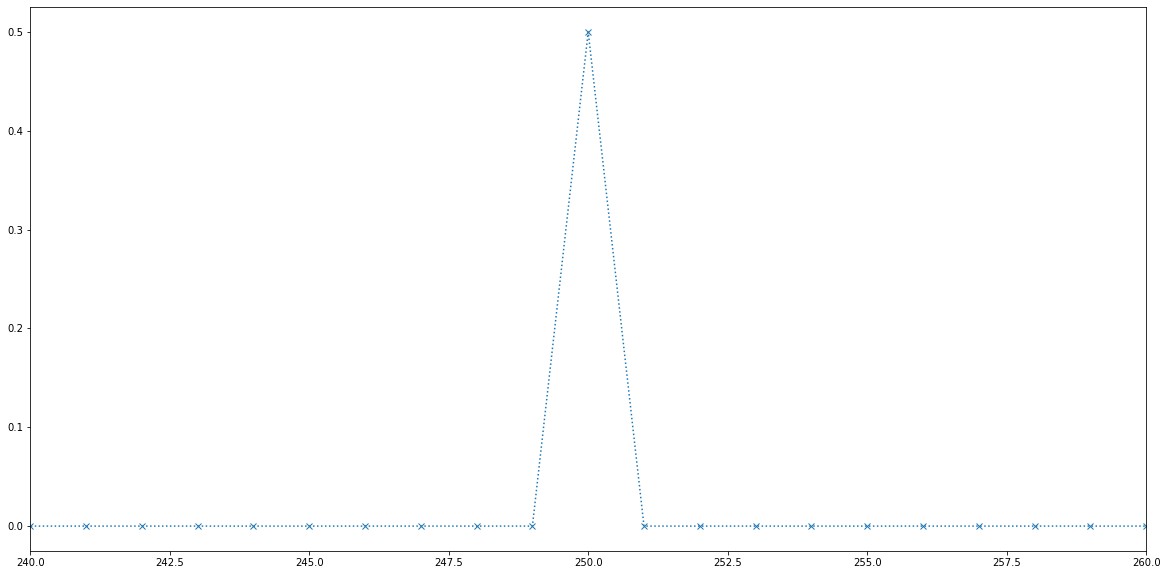

In [41]:
#Calculo las densidades espectrales de potencia y las grafico
PSD_signal1 = np.abs(fft_signal1)**2

plt.figure(1)
plt.plot(ff, PSD_signal1/(N*E_signal1), ':x')
plt.xlim([240,260])  
plt.show()

(240.0, 260.0)

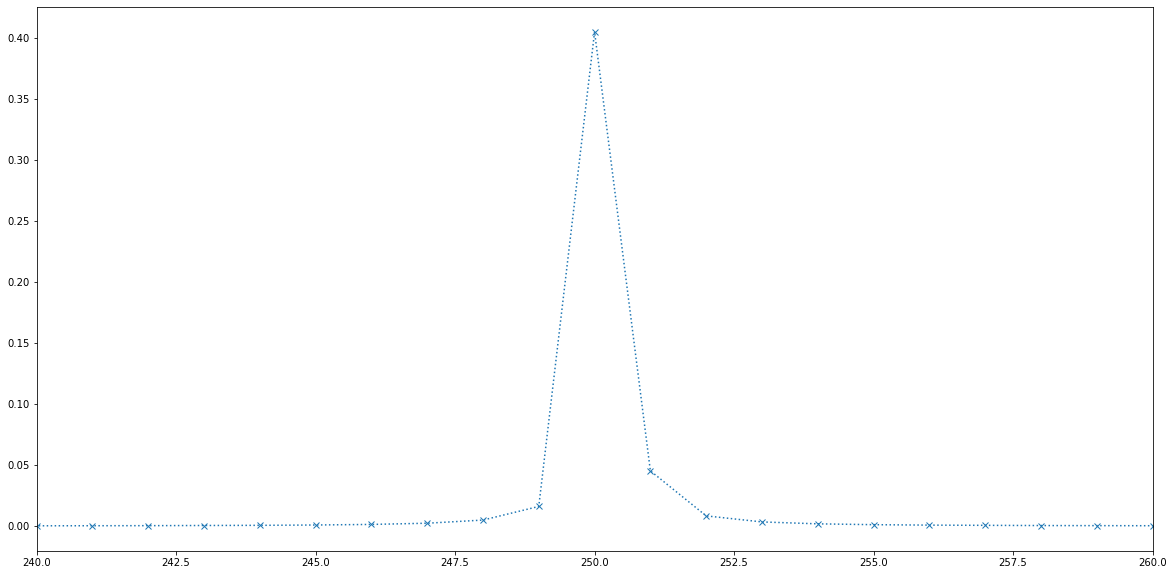

In [42]:
PSD_signal2 = np.abs(fft_signal2)**2
plt.figure(2)
plt.plot(ff, PSD_signal2/(N*E_signal2), ':x')
plt.xlim([240,260])

(240.0, 260.0)

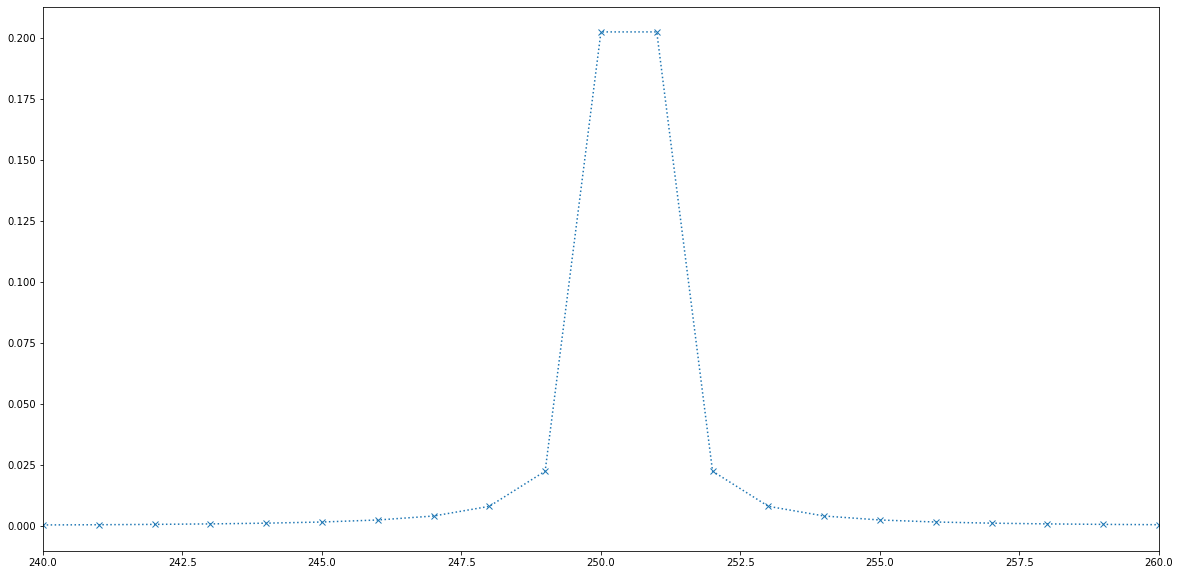

In [43]:
PSD_signal3 = np.abs(fft_signal3)**2
plt.figure(3)
plt.plot(ff, PSD_signal3/(N*E_signal3), ':x')
plt.xlim([240,260])

A partir de los gráficos, podemos observar que existe un desparramo en la DFT debido al desfasaje de frecuencia Δf que le asignamos a la senoidal al inicio de este documento.
Las variaciones ocurren porque la secuencia de datos, no contiene energía en las frecuencias de análisis. Estas frecuencias se obtienen a través de la siguiente ecuación
$$
f_{analysis}(k) = \frac {k * f} {N} \,\,\, donde \, k = 0,1,2,3,4,...,N-1
$$

Repetir el experimento mediante la técnica de zero padding. Dicha técnica consiste en agregar ceros al final de la señal para aumentar Δf de forma ficticia. Probar agregando un vector de 9*N ceros al final. Discuta los resultados obtenidos.

In [44]:
# Aumentamos la cantidad de muestras
n_9muestras = 9 * N
df_9n = fs/n_9muestras # resolución espectral
ff_9n = np.linspace(0, (n_9muestras-1), n_9muestras) * df_9n

In [45]:
fft_signal1_9muestras = np.fft.fft(signal1, axis=0, n = n_9muestras)
fft_signal2_9muestras = np.fft.fft(signal2, axis=0, n = n_9muestras)
fft_signal3_9muestras = np.fft.fft(signal3, axis=0, n = n_9muestras)

(245.0, 255.0)

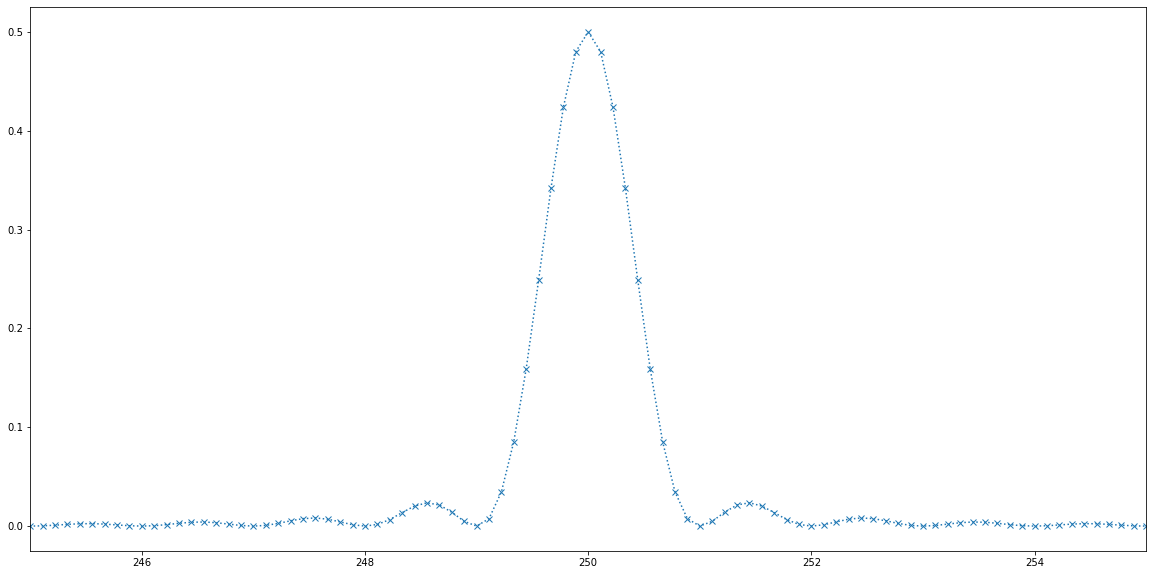

In [46]:
#Calculo las densidades espectrales de potencia y las grafico
PSD_signal1_9muestras = np.abs(fft_signal1_9muestras)**2

plt.figure(1)
plt.plot(ff_9n, PSD_signal1_9muestras/(N*E_signal1), ':x')
plt.xlim([245,255])

(245.0, 255.0)

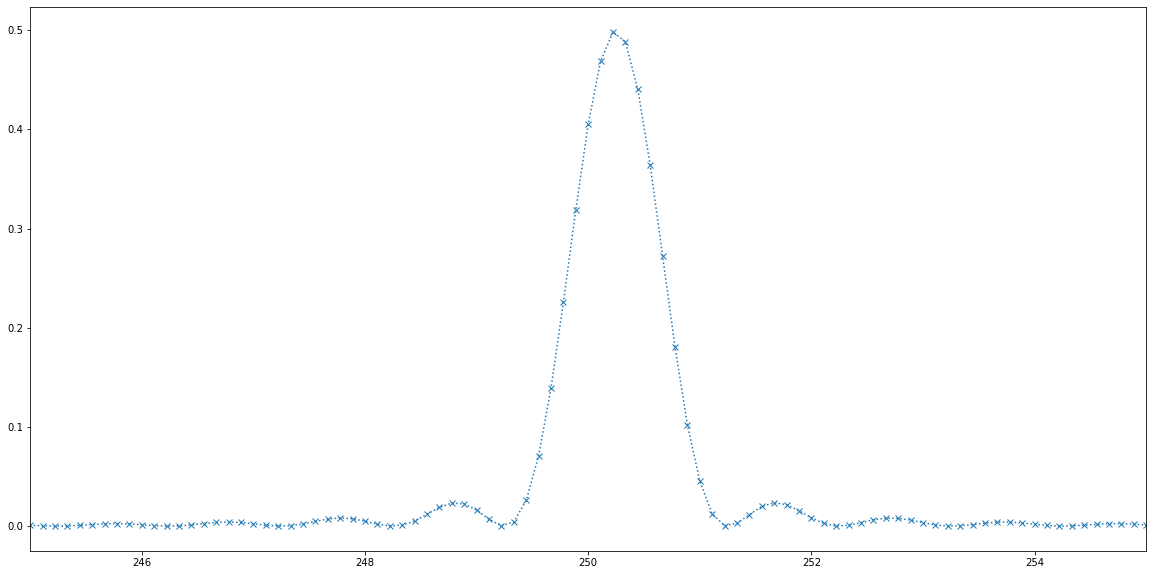

In [47]:
PSD_signal2_9muestras = np.abs(fft_signal2_9muestras)**2
plt.figure(2)
plt.plot(ff_9n, PSD_signal2_9muestras/(N*E_signal2), ':x')
plt.xlim([245,255])

(245.0, 255.0)

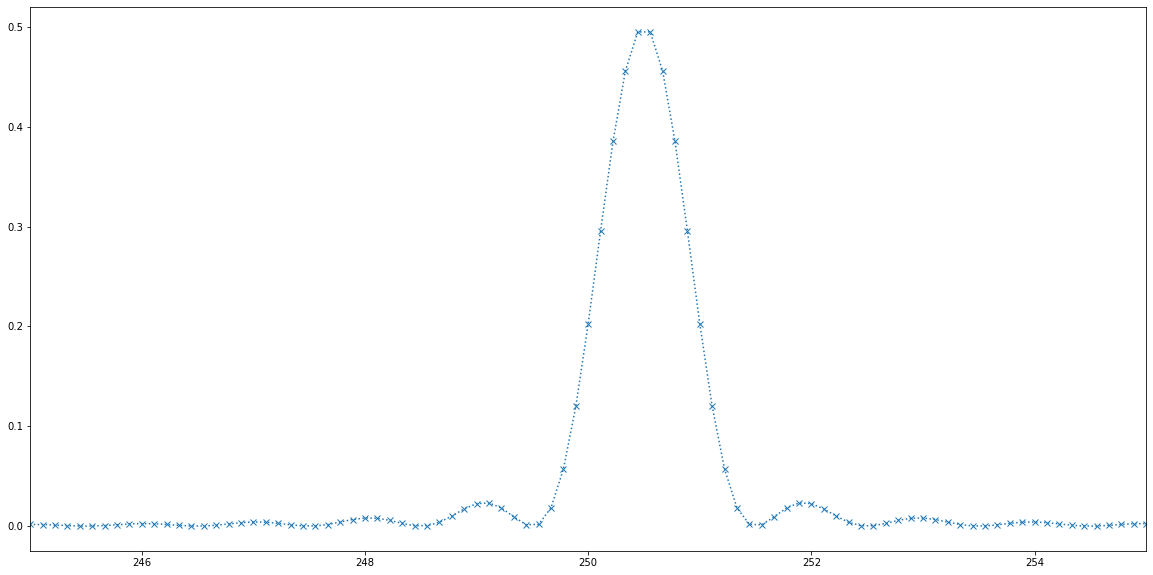

In [48]:
PSD_signal3_9muestras = np.abs(fft_signal3_9muestras)**2
plt.figure(3)
plt.plot(ff_9n, PSD_signal3_9muestras/(N*E_signal3), ':x')
plt.xlim([245,255])

Al tener más muestras, nuestra señal se ve más "redonda" y podemos obtener valores de "bins" que antes no podiamos debido a la cantidad de muestras que estamos usando.